In [6]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Downloading the dataset

In [7]:
df = pd.read_csv("datasets/weather.csv")

In [8]:
df

,Date,Value,Anomaly
0,190001,51.38,-0.86
1,190101,51.74,-0.50
2,190201,51.75,-0.49
3,190301,51.73,-0.51
4,190401,51.53,-0.71
...,...,...,...
121,202101,54.03,1.79
122,202201,53.87,1.63
123,202301,53.73,1.49
124,202401,53.84,1.60


# Processing

In [9]:
df.columns = ['Date','Temperature', 'Anomaly']

In [10]:
df.Temperature.describe()

count    126.000000
mean      52.273254
std        0.769057
min       51.030000
25%       51.732500
50%       52.040000
75%       52.722500
max       54.310000
Name: Temperature, dtype: float64

In [11]:
df_tail = df.tail(5)
df = df.drop(axis='rows', index=[121, 122, 123, 124, 125])

In [12]:
df_tail

,Date,Temperature,Anomaly
121,202101,54.03,1.79
122,202201,53.87,1.63
123,202301,53.73,1.49
124,202401,53.84,1.60
125,202501,54.31,2.07


#  Working with the dataset

In [13]:
linear_regression = stats.linregress(x = df.Date, y = df.Temperature)

In [14]:
a = linear_regression.slope

In [15]:
b = linear_regression.intercept

In [16]:
d_2021 = a * 202101 + b
d_2022 = a * 202201 + b
d_2023 = a * 202301 + b
d_2024 = a * 202401 + b
d_2025 = a * 202501 + b

d_1890 = a * 189001 + b
d_1891 = a * 189101 + b
d_1892 = a * 189201 + b
d_1893 = a * 189301 + b
d_1894 = a * 189401 + b

In [17]:
df_future_predicted = pd.Series(
    [d_2021, d_2022, d_2023, d_2024, d_2025],
    index=['2021', '2022', '2023', '2024', '2025'],
    name="Future predicted")
df_past_predicted = pd.Series(
    [d_1890, d_1891, d_1892, d_1893, d_1894],
    index=['1890', '1891', '1892', '1893', '1894'],
    name="Past Predicted")

In [18]:
df_future_predicted

2021    53.100050
2022    53.114744
2023    53.129437
2024    53.144131
2025    53.158825
Name: Future predicted, dtype: float64

In [19]:
df_tail.Temperature

121    54.03
122    53.87
123    53.73
124    53.84
125    54.31
Name: Temperature, dtype: float64

In [20]:
df_past_predicted

1890    51.175143
1891    51.189837
1892    51.204531
1893    51.219225
1894    51.233919
Name: Past Predicted, dtype: float64

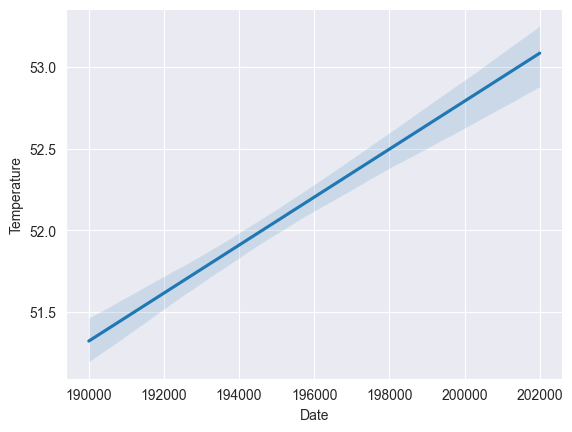

In [21]:
df_plot = sns.regplot(x=df.Date, y=df.Temperature, scatter=False)

(50.0, 55.0)

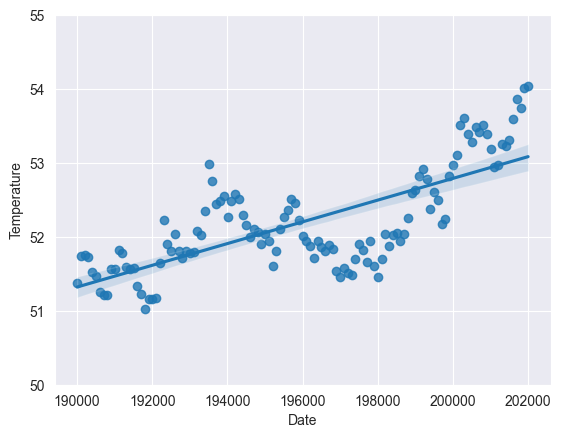

In [22]:
df_plot = sns.regplot(x=df.Date, y=df.Temperature)
df_plot.set_ylim(50,55)